In [1]:
import pymatgen

In [2]:
from pymatgen import Structure

In [3]:
Cu = Structure.from_file("Cu.cif")

In [4]:
from pymatgen.core.surface import SlabGenerator

In [5]:
slabgen = SlabGenerator(Cu,(1, 1, 1), 10, 10)

In [6]:
slabs = slabgen.get_slabs()

In [7]:
print(len(slabs))

1


In [8]:
Cu_111 = slabs[0]

In [9]:
Cu_111

Structure Summary
Lattice
    abc : 2.56061891665316 2.5606189166531603 20.959569147135973
 angles : 86.4979230109456 86.4979230109456 60.00000000000001
 volume : 118.71889639130947
      A : 2.5558371778088786 0.0 0.15641469512787995
      B : 1.2731323769609773 2.216176353588258 0.15641469512787998
      C : 0.0 0.0 20.959569147135973
PeriodicSite: Cu (2.4888, 1.4405, 1.2513) [0.6500, 0.6500, 0.0500]
PeriodicSite: Cu (3.6375, 2.1054, 3.4411) [0.9500, 0.9500, 0.1500]
PeriodicSite: Cu (0.9572, 0.5540, 5.3181) [0.2500, 0.2500, 0.2500]
PeriodicSite: Cu (2.1059, 1.2189, 7.5079) [0.5500, 0.5500, 0.3500]
PeriodicSite: Cu (3.2546, 1.8837, 9.6977) [0.8500, 0.8500, 0.4500]

In [10]:
print(Cu_111.miller_index, Cu_111.shift)

(1, 1, 1) 0.5


In [11]:
from pymatgen.analysis.adsorption import plot_slab
from matplotlib import pyplot as plt
%matplotlib inline

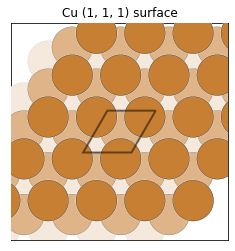

In [12]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
plot_slab(Cu_111, ax, adsorption_sites=False)
ax.set_title("Cu (1, 1, 1) surface")
ax.set_xticks([])
ax.set_yticks([])
plt.show()

In [13]:
Si = Structure.from_file("Si.cif")

In [14]:
slabgen = SlabGenerator(Si, (1, 1, 1), 10, 10)

In [15]:
slabs = slabgen.get_slabs()

In [16]:
print(len(slabs))

2


In [17]:
slabs[0].matches(slabs[1])

False

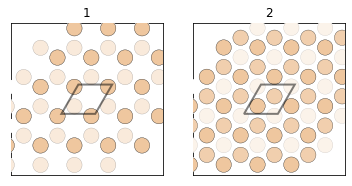

In [18]:
fig = plt.figure()
for n, slab in enumerate(slabs):
    ax = fig.add_subplot(1, 2, n+1)
    plot_slab(slab, ax, adsorption_sites=False)
    ax.set_title(n+1)
    ax.set_xticks([])
    ax.set_yticks([])
plt.show()

In [19]:
slabs[0].to(fmt="cif", filename="Si_111_1.cif")
slabs[1].to(fmt="cif", filename="Si_111_2.cif")

In [20]:
from pymatgen.core.surface import generate_all_slabs

In [21]:
all_slabs = generate_all_slabs(Si, 3, 10, 10)

In [22]:
print(len(all_slabs))

18


In [23]:
for slab in all_slabs:
    print(slab.miller_index, slab.shift)

(1, 1, 1) 0.375
(1, 1, 1) 0.875
(3, 3, 2) 0.08333333333333337
(3, 3, 1) 0.125
(3, 3, 1) 0.29166666666666674
(1, 1, 0) 0.25
(3, 2, 2) 0.04166666666666674
(3, 2, 2) 0.1250000000000001
(3, 2, 1) 0.08333333333333326
(3, 2, 0) 0.04166666666666652
(3, 1, 1) 0.04166666666666674
(3, 1, 1) 0.20833333333333348
(3, 1, 0) 0.08333333333333331
(1, 0, 0) 0.125
(2, 2, 1) 0.0625
(2, 2, 1) 0.1875
(2, 1, 1) 0.125
(2, 1, 0) 0.06249999999999997


In [24]:
LiFePO4 = Structure.from_file("LiFePO4.cif")

In [25]:
LiFePO4.add_oxidation_state_by_element({"Fe": 2, "Li": 1, "P": 5, "O": -2})

In [26]:
slabgen = SlabGenerator(LiFePO4, (0, 0, 1), 10, 10)

In [27]:
slabs = slabgen.get_slabs(bonds={("P", "O"): 2})

In [28]:
print(len(slabs))

5


In [29]:
for n, slab in enumerate(slabs):
    print(n, slab.is_polar(), slab.is_symmetric())

0 True False
1 True False
2 True False
3 True False
4 False False


In [30]:
from pymatgen.core.surface import generate_all_slabs

In [31]:
all_slabs = generate_all_slabs(LiFePO4, 2, 10, 10, bonds={("P", "O"): 2})

In [32]:
valid_slabs = []
for slab in all_slabs:
    if not slab.is_polar() and slab.is_symmetric():
        valid_slabs.append(slab)

print(len(all_slabs), len(valid_slabs))

91 2


In [33]:
TiO2 = Structure.from_file("TiO2.cif")

In [34]:
TiO2.add_oxidation_state_by_element({"Ti": 4, "O": -2})

In [35]:
all_slabs = generate_all_slabs(TiO2, 2, 10, 10)
print(len(all_slabs))

119


In [36]:
for n, slab in enumerate(all_slabs):
    print(n, slab.is_symmetric(), slab.is_polar())

0 True False
1 False True
2 False True
3 False False
4 False True
5 False True
6 True False
7 False True
8 False True
9 False False
10 False True
11 False True
12 False True
13 False False
14 False True
15 False True
16 True False
17 True False
18 True False
19 False True
20 False True
21 False True
22 True False
23 False True
24 False False
25 False True
26 True False
27 True False
28 False True
29 True False
30 False True
31 False True
32 False False
33 False True
34 True False
35 True False
36 False True
37 False False
38 False True
39 False True
40 False True
41 True False
42 False False
43 True False
44 False True
45 False False
46 False True
47 True False
48 True False
49 False True
50 False True
51 False False
52 False True
53 False True
54 True False
55 True False
56 False True
57 False True
58 False True
59 False True
60 True False
61 True False
62 False True
63 False True
64 False True
65 True False
66 True False
67 False True
68 False True
69 False True
70 False True
71 True

In [37]:
# Polar slabs
print(all_slabs[0].dipole)
print(all_slabs[12].dipole)

[-5.32907052e-15  0.00000000e+00  3.90798505e-14]
[-0.17812561 -1.91199374 21.44070173]


In [38]:
# Polar slabs
print(all_slabs[0].dipole)
print(all_slabs[12].dipole)

[-5.32907052e-15  0.00000000e+00  3.90798505e-14]
[-0.17812561 -1.91199374 21.44070173]


In [39]:
# Non-polar slabs
print(all_slabs[1].dipole)
print(all_slabs[5].dipole)

[  2.55146323   0.68977848 -23.92326612]
[  5.10292646   1.37955696 -47.84653224]


In [40]:
WSe2 = Structure.from_file("WSe2.cif")

/home/max/.virtualenvs/aiida/lib/python3.7/site-packages/pymatgen/io/cif.py:1194: UserWarning: Issues encountered while parsing CIF: Some fractional co-ordinates rounded to ideal values to avoid issues with finite precision.
  "Issues encountered while parsing CIF: %s" % "\n".join(self.warnings)


In [41]:
slabgen = SlabGenerator(WSe2, (0, 0, 1), 10, 10)

In [42]:
slabs = slabgen.get_slabs(bonds={("W", "Se"): 3})

In [43]:
print(len(slabs))

1


In [44]:
slabgen = SlabGenerator(WSe2, (0, 0, 1), 10, 20, 10)
new_slabs = slabgen.get_slabs(bonds={("W", "Se"): 3})
new_slab = new_slabs[0]
print(new_slab)

Slab Summary (W2 Se4)
Reduced Formula: WSe2
Miller index: (0, 0, 1)
Shift: 0.0000, Scale Factor: [[-1 -1  0]
 [ 0  1  0]
 [ 0  0 -1]]
abc   :   3.327070   3.327070  45.206853
angles:  90.000000  90.000000 120.000000
Sites (6)
1 W     0.333333     0.666667     0.083333
2 W     0.666667     0.333333     0.250000
3 Se     0.666667     0.333333     0.120523
4 Se     0.333333     0.666667     0.287190
5 Se     0.666667     0.333333     0.046144
6 Se     0.333333     0.666667     0.212810


In [45]:
print(slabs[0])

Slab Summary (W2 Se4)
Reduced Formula: WSe2
Miller index: (0, 0, 1)
Shift: 0.0000, Scale Factor: [[1 0 0]
 [0 1 0]
 [0 0 1]]
abc   :   3.327070   3.327070  30.137902
angles:  90.000000  90.000000 120.000000
Sites (6)
1 W     0.333333     0.666667     0.125000
2 W     0.666667     0.333333     0.375000
3 Se     0.666667     0.333333     0.180784
4 Se     0.333333     0.666667     0.430785
5 Se     0.666667     0.333333     0.069215
6 Se     0.333333     0.666667     0.319215


In [46]:
print(slabs[0].num_sites, new_slab.num_sites)

6 6


In [47]:
from pymatgen.analysis.adsorption import AdsorbateSiteFinder

In [48]:
asf = AdsorbateSiteFinder(Cu_111)

In [49]:
ads_sites = asf.find_adsorption_sites()
ads_sites

{'ontop': [array([ 3.13253096,  1.81308338, 11.69272977])],
 'bridge': [array([ 1.85461237,  1.81308338, 11.61452242])],
 'hollow': [array([ 0.57988459,  0.33563247, 11.48417684]),
  array([ 1.85620778,  1.07435792, 11.58845331])],
 'all': [array([ 3.13253096,  1.81308338, 11.69272977]),
  array([ 1.85461237,  1.81308338, 11.61452242]),
  array([ 0.57988459,  0.33563247, 11.48417684]),
  array([ 1.85620778,  1.07435792, 11.58845331])]}

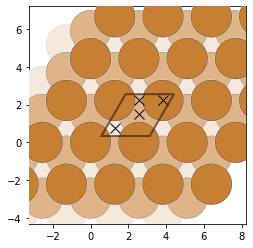

In [50]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
plot_slab(Cu_111, ax, adsorption_sites=True)
plt.show()

In [51]:
from pymatgen import Molecule

In [52]:
adsorbate = Molecule("H", [[0, 0, 0]])

In [53]:
ads_structs = asf.generate_adsorption_structures(adsorbate, repeat=[1, 1, 1], find_args={"distance": 1.6})

/home/max/.virtualenvs/aiida/lib/python3.7/site-packages/pymatgen/core/structure.py:761: UserWarning: Not all sites have property bulk_equivalent. Missing values are set to None.
  "are set to None." % k
/home/max/.virtualenvs/aiida/lib/python3.7/site-packages/pymatgen/core/structure.py:761: UserWarning: Not all sites have property bulk_wyckoff. Missing values are set to None.
  "are set to None." % k


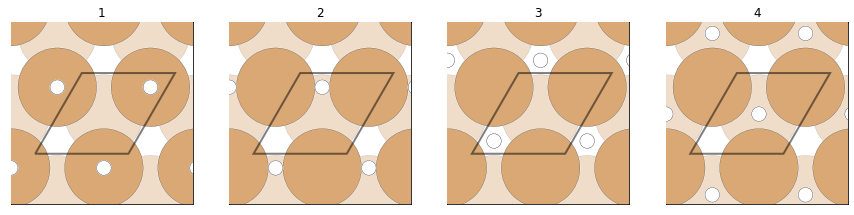

In [54]:
fig = plt.figure(figsize=[15, 60])
for n, ads_struct in enumerate(ads_structs):
    ax = fig.add_subplot(1, 4, n+1)
    plot_slab(ads_struct, ax, adsorption_sites=False)
    ax.set_title(n+1)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_xlim(0, 5)
    ax.set_ylim(-1, 4)
plt.show()

In [55]:
Cu = Structure.from_file("Cu.cif")

In [56]:
slabgen = SlabGenerator(Cu, (1, 1, 1), 10, 10)
slabs = slabgen.get_slabs()
slab = slabs[0]

In [57]:
from pymatgen.analysis.adsorption import AdsorbateSiteFinder

In [58]:
asf = AdsorbateSiteFinder(slab)

In [59]:
from pymatgen import Molecule

In [60]:
H = Molecule("H", [[0, 0, 0]])

In [61]:
ads_structs = asf.generate_adsorption_structures(H, min_lw=7, find_args={"distance": 1.6})

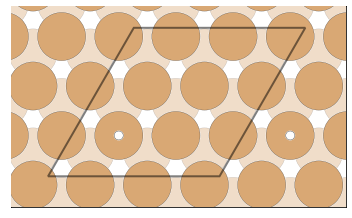

In [62]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
plot_slab(ads_structs[0], ax, adsorption_sites=False)
ax.set_xlim(-1, 14)
ax.set_ylim(-1, 8)
ax.set_xticks([])
ax.set_yticks([])
plt.show()

In [64]:
CO2_x = Molecule(["O", "C", "O"], [[-1.16, 0, 0], [0, 0, 0], [1.16, 0, 0]])
CO2_y = Molecule(["O", "C", "O"], [[0, -1.16, 0], [0, 0, 0], [0, 1.16, 0]])
CO2_z = Molecule(["O", "C", "O"], [[0, 0, -1.16], [0, 0, 0], [0, 0, 1.16]])

In [66]:
ads_sites = asf.find_adsorption_sites()
ads_coords = ads_sites['ontop'][0]

In [69]:
x_struct = asf.add_adsorbate(CO2_x, ads_coords, repeat=[2, 2, 1])
y_struct = asf.add_adsorbate(CO2_y, ads_coords, repeat=[2, 2, 1])
z_struct = asf.add_adsorbate(CO2_z, ads_coords, repeat=[2, 2, 1])

In [ ]:
for struc, ax, title in zip([x_struct, y_struct, z_struct], plt.subplots(1, 3, figsize=[15, 45])[1], ["x", "y", "z"]):
    plot_slab(struc, ax, adsorption_sites=False)
    ax.set_title(r"CO$_2$ in the %s direction" % title)
    ax.set_xlim(-1, 10)
    ax.set_ylim(-3, 8)
    ax.set_xticks([])
    ax.set_yticks([])
plt.show()